In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df1=df.copy()
df1

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
df1.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
df1.duplicated().sum()

0

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:>

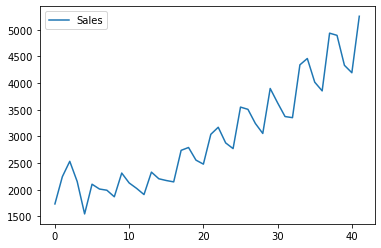

In [8]:
df1.plot()

From the above line plot, we observe an upward trend in the sales,seaonal componenet is also seen.

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

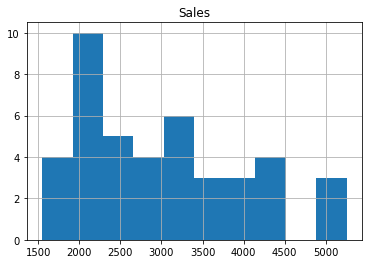

In [9]:
df1.hist()

The data appears to be slightly skewed.

<AxesSubplot:ylabel='Density'>

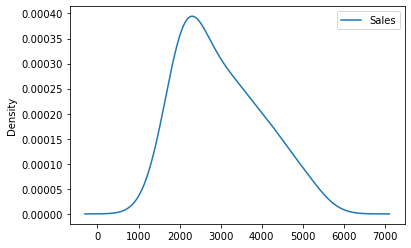

In [10]:
df1.plot(kind='kde')

In [11]:
temp = df1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
df1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')
df1.head()

C:\Users\Avanti\AppData\Local\Temp/ipykernel_23168/1623964512.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp = df1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')


,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [12]:
df1 = df1.drop(['Quarter'], axis=1)
df1.reset_index(inplace=True)
df1['quater'] = pd.to_datetime(df1['quater'])
df1 = df1.set_index('quater')
df1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


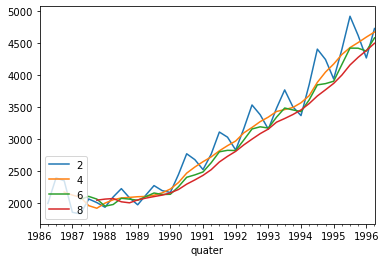

In [13]:
for i in range(2,10,2):
    df1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

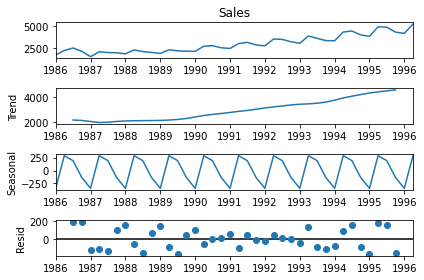

In [14]:
ts_add = seasonal_decompose(df1.Sales,model="additive")
fig = ts_add.plot()
plt.show()


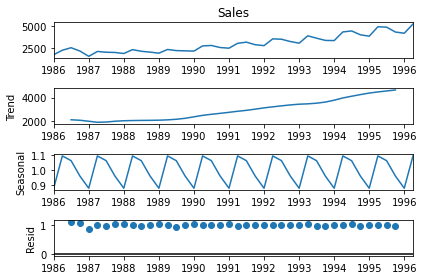

In [15]:
ts_mul = seasonal_decompose(df1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()


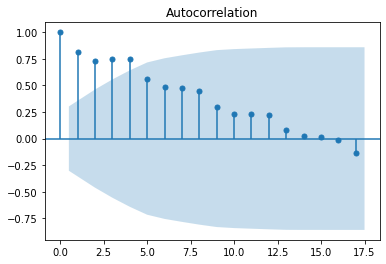

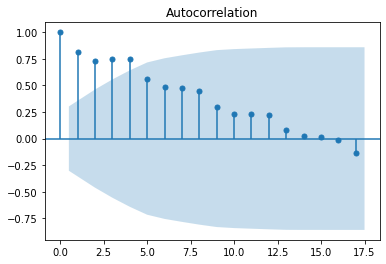

In [16]:
tsa_plots.plot_acf(df1.Sales)


# Time Series forecasting with ARIMA

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
X = df1['Sales'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Avanti\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   26
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -172.036
Method:                       css-mle   S.D. of innovations            163.191
Date:                Mon, 23 Jan 2023   AIC                            358.071
Time:                        10:03:11   BIC                            366.878
Sample:                             1   HQIC                           360.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8439     26.509      1.579      0.114     -10.112      93.800
ar.L1.D.y     -0.1479      0.195     -0.758      0.448      -0.530       0.234
ar.L2.D.y     -0.3127      0.157     -1.996      0.0

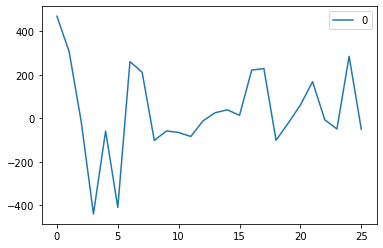

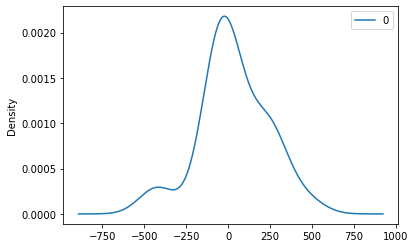

                0
count   26.000000
mean    31.325229
std    202.029833
min   -438.906016
25%    -58.603674
50%     -9.191046
75%    200.235838
max    468.290074


In [19]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [20]:
# The plot of residual shows that there might be some trend information not captured by the model.
# We will try the rolling forcast ARIMA model.

# Rolling Forecast ARIMA model.

In [21]:
history = [x for x in train]
predictions = list()

In [22]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\Avanti\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=3135.587044, expected=3243.859993
predicted=3188.846528, expected=3056.000000
predicted=3734.223939, expected=3899.000000
predicted=3782.620608, expected=3629.000000
predicted=3355.125737, expected=3373.000000
predicted=3297.218442, expected=3352.000000
predicted=4112.813713, expected=4342.000000
predicted=3961.044575, expected=4461.000000
predicted=4130.786404, expected=4017.000000
predicted=3912.795318, expected=3854.000000
predicted=4687.043506, expected=4936.000000
predicted=4970.519654, expected=4895.000000
predicted=4384.039898, expected=4333.000000


C:\Users\Avanti\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Avanti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4229.062447, expected=4194.000000
predicted=5261.672755, expected=5253.000000


C:\Users\Avanti\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [23]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 31594.694


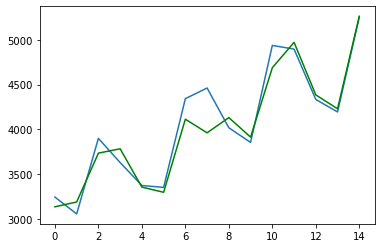

In [24]:
plt.plot(test)
plt.plot(predictions, color='green')
plt.show()

In [25]:
# The green line shows the predicted values against the blue line showing the expected values

# Multiple models.

In [26]:
df2 = pd.get_dummies(df, columns = ['Quarter'])
df2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
t= np.arange(1,43)
df2['t'] = t
df2['t_sq'] = df2['t']*df2['t']
log_Sales=np.log(df2['Sales'])
df2['log_Sales']=log_Sales
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [28]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])

Linear model

In [29]:
import statsmodels.formula.api as smf

In [31]:
linear_model=smf.ols('Sales ~ t',data=train1).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test1['t'])))
rmse_linear=(np.sqrt(np.mean(np.array(test1['Sales'])-np.array(pred_linear))**2))
rmse_linear

580.1224130918638

Exponential model

In [36]:
expo_model=smf.ols('log_Sales ~t',data=train1).fit()
pred_expo=pd.Series(expo_model.predict(pd.DataFrame(test1['t'])))
rmse_expo= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_expo)))**2))
rmse_expo

588.1405104900188

Quadratic model

In [38]:
quad_model=smf.ols('Sales ~ t+t_sq',data=train1).fit()
pred_quad=pd.Series(quad_model.predict(pd.DataFrame(test1[['t','t_sq']])))
rmse_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(pred_quad))**2))
rmse_quad

783.7297975037454

Additive Seasonality

In [41]:
add_model=smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
pred_add=pd.Series(add_model.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmse_add=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(pred_add))**2))
rmse_add

1869.7188209186943

Additive Seasonality with linear trend

In [ ]:
addlinear_model= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
pred_addlinear=pd.Series(addlinear_model.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmse_addlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(pred_addlinear))**2))
rmse_addlinear

Additive Seasonality with quadratic trend

In [43]:
addquad_model=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_addquad=pd.Series(addquad_model.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmse_addquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(pred_addquad))**2))
rmse_addquad

412.1144436053153

Multiplicative Seasonality

In [44]:
mul_model=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul= pd.Series(mul_model.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmse_mul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul)))**2))
rmse_mul

2374.9194407954365

Multiplicative Seasonality with linear trend

In [45]:
mullin_model= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mullin= pd.Series(mullin_model.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmse_mulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mullin)))**2))
rmse_mulin

5359.687911932153

Multiplicative Seasonality with quadraric trend

In [47]:
mulquad_model= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mulquad= pd.Series(mulquad_model.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mulquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mulquad)))**2))
rmse_mulquad

3630.56194673444

Comparing the Result.

In [50]:
output = {'Model':pd.Series(['rmse_mulquad','rmse_add','rmse_addlinear','rmse_addquad','rmse_expo','rmse_linear','rmse_mul','rmse_mulin','rmse_quad']),
          'Values':pd.Series([rmse_mulquad,rmse_add,rmse_addlinear,rmse_addquad,rmse_expo,rmse_linear,rmse_mul,rmse_mulin,rmse_quad])}

In [51]:
rmse=pd.DataFrame(output)
print(rmse)

            Model       Values
0    rmse_mulquad  3630.561947
1        rmse_add  1869.718821
2  rmse_addlinear   596.152628
3    rmse_addquad   412.114444
4       rmse_expo   588.140510
5     rmse_linear   580.122413
6        rmse_mul  2374.919441
7      rmse_mulin  5359.687912
8       rmse_quad   783.729798


# Additive Seasonality with quadratic trend has the best RMSE value.